In [1]:
import os
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from tsfresh.feature_extraction import feature_calculators as fc

def extract_feats(ts):
    std = fc.standard_deviation(ts)
    kurtosis = fc.kurtosis(ts)
    skewness = fc.skewness(ts)
    cam = fc.count_above_mean(ts)
    cbm = fc.count_below_mean(ts)
    lsam = fc.longest_strike_above_mean(ts)
    lsbm = fc.longest_strike_below_mean(ts)
    psd = fc.fourier_entropy(ts, bins=1000000)
    energy = fc.abs_energy(ts)

    return np.array([std, kurtosis, skewness, cam, cbm, lsam, lsbm, psd, energy])

In [2]:
data = dd.read_csv(os.getcwd()+'/data/vitalPeriodic.csv')
df = data[data['patientunitstayid'] == 141168].compute()
print(df.head())

   vitalperiodicid  patientunitstayid  observationoffset  temperature  sao2  \
0         37376747             141168               2059          NaN   NaN   
1         37404957             141168               1289          NaN   NaN   
2         37385871             141168               1794          NaN  91.0   
3         37401664             141168               1374          NaN  90.0   
4         37377404             141168               2039          NaN  98.0   

   heartrate  respiration   cvp  etco2  systemicsystolic  systemicdiastolic  \
0       92.0          NaN  30.0    NaN               NaN                NaN   
1      118.0          NaN   NaN    NaN               NaN                NaN   
2       78.0          NaN   NaN    NaN               NaN                NaN   
3      118.0          NaN   NaN    NaN               NaN                NaN   
4       92.0          NaN  33.0    NaN               NaN                NaN   

   systemicmean  pasystolic  padiastolic  pamean  

In [3]:
df = df.sort_values(by='observationoffset')
df

,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
15,37449174,141168,119,NaN,93.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,37448979,141168,124,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,37448785,141168,129,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,37448594,141168,134,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,37448402,141168,139,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,37368809,141168,2294,NaN,79.0,100.0,NaN,NaN,NaN,102.0,84.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,37368636,141168,2299,NaN,78.0,100.0,NaN,NaN,NaN,94.0,78.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,37368463,141168,2304,NaN,98.0,100.0,NaN,NaN,NaN,92.0,62.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,37368290,141168,2309,NaN,100.0,100.0,NaN,NaN,NaN,90.0,76.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
time = df['observationoffset'].to_numpy()
time = np.cumsum(np.diff(time))
time = np.hstack((0, time)) # Append zero for first measurement
hr = df['heartrate'].to_numpy()

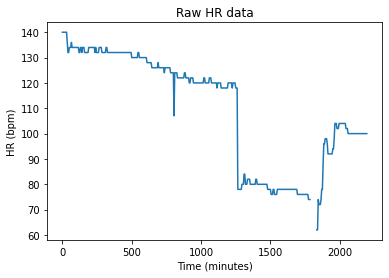

In [5]:
plt.plot(time, hr)
plt.title('Raw HR data')
plt.xlabel('Time (minutes)')
plt.ylabel('HR (bpm)')
plt.show()

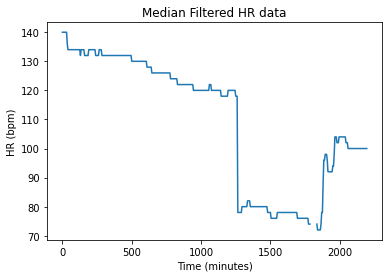

In [6]:
hr = medfilt(hr, 5)
plt.plot(time, hr)
plt.title('Median Filtered HR data')
plt.xlabel('Time (minutes)')
plt.ylabel('HR (bpm)')
plt.show()

In [7]:
ts = pd.DataFrame({'time': time, 'hr': hr})
ts = ts.interpolate()
extract_feats(ts['hr'].to_numpy())

array([ 2.21950912e+01, -1.36245268e+00, -5.24785880e-01,  2.53000000e+02,
        1.66000000e+02,  2.53000000e+02,  1.66000000e+02,  4.73754507e+00,
        5.32394000e+06])

In [8]:
data['patientunitstayid'].unique().compute()

0          141168
1          141178
2          141179
3          141194
4          141196
           ...   
192826    3353235
192827    3353237
192828    3353251
192829    3353254
192830    3353263
Name: patientunitstayid, Length: 192831, dtype: int64